In [77]:
#Libs and plots
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as nmp 
import pandas as pd
import math


def draw_plot(func, a, b, c, xx, yy):
    plt.figure(figsize=(8, 4))
    plt.plot(xx, yy, 'go')
    y2 = func(a, b, c, xx)
    plt.plot(xx, y2)
    plt.grid()
    plt.show()
    
def draw_log(a, b, c, xx):
    res = nmp.array([])
    for i in xx:
         res = nmp.append(res, a + b * math.log(i, math.exp(1)))
    return res

In [78]:
#Functions
def linear(a,b,c,x):
    return a*x+b

def square(a,b,c,x):
    return a*x*x+b*x+c

def exponent(a,b,c,x):
    return a*pow(math.exp(1),b*x)

def logarithm(a,b,c,x):
    return (a+b*(math.log(x,math.exp(1))))

def power(a,b,c,x):
    return a*pow(x,b)

In [79]:
#Calculation of coefficients
def linear_coefficients(tmp_x,tmp_y):
    Sx = 0
    Sxx = 0
    Sxy = 0
    Sy = 0
    n = (len(tmp_x))
    for x in range(0,n):
        Sx += tmp_x[x]  
        Sy += tmp_y[x]
        Sxx += (tmp_x[x]*tmp_x[x])
        Sxy += (tmp_x[x]*tmp_y[x])
    tmp_a = (Sxy*n-Sx*Sy)/(Sxx*n-Sx*Sx)
    tmp_b = (Sxx*Sy-Sx*Sxy)/(Sxx*n-Sx*Sx)
    return [tmp_a,tmp_b]


def square_coefficients(tmp_x,tmp_y):
    matr_sums = nmp.array([[len(tmp_x), nmp.sum(tmp_x), nmp.sum(pow(tmp_x,2))],
                           [nmp.sum(tmp_x), nmp.sum(pow(tmp_x,2)), nmp.sum(pow(tmp_x,3))], 
                           [nmp.sum(pow(tmp_x,2)), nmp.sum(pow(tmp_x,3)), nmp.sum(pow(tmp_x,4))]])
    matr_res = nmp.array([nmp.sum(tmp_y), nmp.sum(tmp_y*tmp_x), nmp.sum(tmp_y*pow(tmp_x,2))])
    return nmp.linalg.solve(matr_sums, matr_res)


def exponent_coefficients(tmp_x,tmp_y): 
    ln_y = nmp.array([])
    for y in tmp_y:
        ln_y = nmp.append(ln_y, [math.log(y, math.exp(1))])
    tmp_b, tmp_a = linear_coefficients(tmp_x, ln_y)
    tmp_a = math.exp(tmp_a)
    return [tmp_a,tmp_b]


def logariphmic_coefficients(tmp_x,tmp_y):
    ln_x = nmp.array([])
    for x in tmp_x:
        ln_x = nmp.append(ln_x, [math.log(x, math.exp(1))])
    tmp_b, tmp_a = linear_coefficients(ln_x, tmp_y)
    return [tmp_a, tmp_b]


def power_coefficients(tmp_x,tmp_y):
    ln_y = nmp.array([])
    ln_x = nmp.array([])
    for i in tmp_y:
        ln_y = nmp.append(ln_y, [math.log(i, math.exp(1))])
    for i in tmp_x:
        ln_x = nmp.append(ln_x, [math.log(i, math.exp(1))])
    tmp_b, tmp_a = linear_coefficients(ln_x, ln_y)
    tmp_a = nmp.exp(tmp_a)
    return [tmp_a,tmp_b]

In [80]:
#Deviation value, average square deviation value
def dev_value(x_arr,y_arr,a,b,c,func):
    n = len(x_arr)
    summ = 0
    for i in range(0,n):
        summ += pow(func(a,b,c,x_arr[i])-y_arr[i],2)
    return summ

def avg_square_dev(x_arr,y_arr,a,b,c,func):
    n = len(x_arr)
    return math.sqrt(dev_value(x_arr,y_arr,a,b,c,func)/n)

Выводить таблицу в файл? (1 - да, иначе - нет)
1

Результаты вычислений:

Линейная функция: f(x) = 3.6053613053613036x+(-0.621048951048945)
Мера отклонения: 16.824396736596732
Среднеквадратичное отклонение: 1.1840747701826355


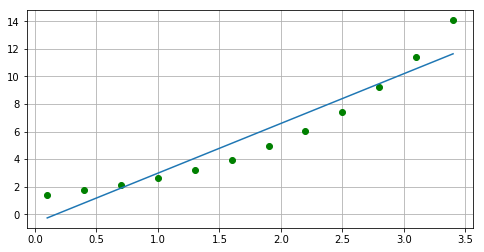



Полиномиальная функция: f(x) = 1.8091852591852675*x^2+(-0.6689199689199855)*x+(1.2212232212232261)
Мера отклонения: 99.71203533162014
Среднеквадратичное отклонение: 2.8825919374124065


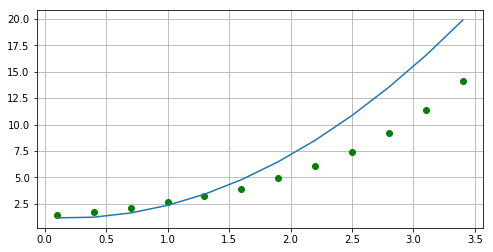



Экспоненциальная функция: f(x) = 1.3129539006418447*e^((0.6960546461686792)*x)
Мера отклонения: 0.012905697141803976
Среднеквадратичное отклонение: 0.03279443187214863


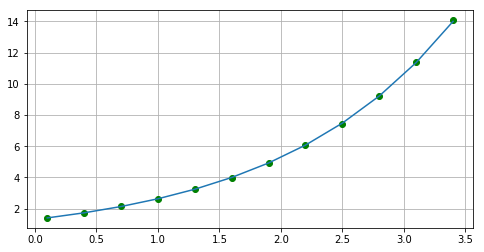



Степенная функция: f(x) = 3.786823432895106*x^(0.65998217067786)
Мера отклонения: 52.563584138426194
Среднеквадратичное отклонение: 2.0929163094118652


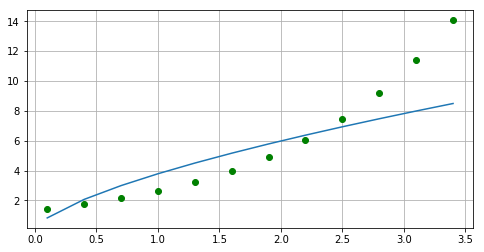



Логарифмическая функция: f(x) = 4.959289911000525+(3.0290396823894055)*ln(x)
Мера отклонения: 77.92128964227474
Среднеквадратичное отклонение: 2.5482230678500057


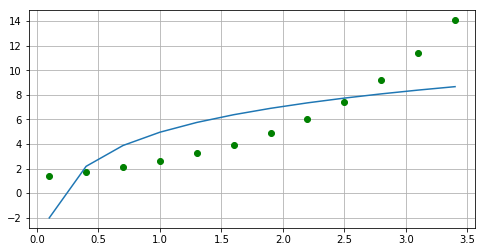




Наиболее приближенной является функция:
Экспоненциальная функция: f(x) = 1.3129539006418447*e^((0.6960546461686792)*x)
Среднеквадратичное отклонение - 0.03279443187214863
Таблица вычислений доступна в файле


In [81]:
#main
f = open('lab2input.txt','r')
f2 = open('lab2output.txt','w')
x_file = str(f.readline())
y_file = str(f.readline())
f.close()

if_save = False
x_arr = x_file.split()
y_arr = y_file.split()
x_a = nmp.asarray(list(map(float,x_arr)))
y_a = nmp.asarray(list(map(float,y_arr)))

min_digit = 1000000000
min_func = 0

print('Выводить таблицу в файл? (1 - да, иначе - нет)')
inp = str(input())
if (inp is '1'):
    if_save = True
    

print('\nРезультаты вычислений:\n')

ka,kb = linear_coefficients(x_a,y_a)
print(f'Линейная функция: f(x) = {str(ka)}x+({str(kb)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,linear))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,linear))}')
draw_plot(linear, ka, kb, 0, x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,linear)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,linear)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 1
    min_digit = k_avg

print('\n')
ka,kb,kc = square_coefficients(x_a,y_a)
print(f'Полиномиальная функция: f(x) = {str(ka)}*x^2+({str(kb)})*x+({str(kc)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,kc,square))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,kc,square))}')
draw_plot(square, ka, kb, kc,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,kc,square)
k_avg = avg_square_dev(x_a,y_a,ka,kb,kc,square)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = kc
    min_func = 2
    min_digit = k_avg
                          
print('\n')
ka,kb = exponent_coefficients(x_a,y_a)
print(f'Экспоненциальная функция: f(x) = {str(ka)}*e^(({str(kb)})*x)')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,exponent))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,exponent))}')
draw_plot(exponent, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,exponent)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,exponent)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 3
    min_digit = k_avg
                          
print('\n')
ka,kb = power_coefficients(x_a,y_a)
print(f'Степенная функция: f(x) = {str(ka)}*x^({str(kb)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,power))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,power))}')
draw_plot(power, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,power)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,power)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 4
    min_digit = k_avg
    
print('\n')
ka,kb = logariphmic_coefficients(x_a,y_a)
print(f'Логарифмическая функция: f(x) = {str(ka)}+({str(kb)})*ln(x)')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,logarithm))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,logarithm))}')
draw_plot(draw_log, ka, kb, 0, x_a, y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,logarithm)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,logarithm)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 5
    min_digit = k_avg

if (if_save):
    data = nmp.array([['Вид функции', 'Линейная', 'Полиномиальная', 'Экспоненциальная', 'Логарифмическая', 'Степенная']])
    digit_rows = nmp.array([])
    y_str_arr = nmp.array([])
    for i, j in zip(x_a, y_a):
        x_st = str(i)
        y_st = str(j)
        digit_rows = nmp.append(digit_rows, 'x = ' + x_st + ', y = ' + y_st)
        ka,kb = linear_coefficients(x_a,y_a)
        digit_rows = nmp.append(digit_rows, linear(ka,kb,0,i))
        kc,kb,ka = square_coefficients(x_a,y_a)
        digit_rows = nmp.append(digit_rows, square(ka,kb,kc,i))
        ka,kb = exponent_coefficients(x_a,y_a)
        digit_rows = nmp.append(digit_rows, exponent(ka,kb,0,i))
        ka,kb = power_coefficients(x_a,y_a)
        digit_rows = nmp.append(digit_rows, power(ka,kb,0,i))
        ka,kb = logariphmic_coefficients(x_a,y_a)
        digit_rows = nmp.append(digit_rows, logarithm(ka,kb,0,i))
        data = nmp.append(data, [digit_rows], 0)
        digit_rows = []

    deviation_row = nmp.array([])
    avg_dev_row = nmp.array([])
    a_row = nmp.array([])
    b_row = nmp.array([])
    c_row = nmp.array([])

    deviation_row = nmp.append(deviation_row, 'Сумм. отклонение')
    avg_dev_row = nmp.append(avg_dev_row, 'Среднеквадр. откл')
    a_row = nmp.append(a_row, 'Коэффициент a')
    b_row = nmp.append(b_row, 'Коэффициент b')
    c_row = nmp.append(c_row, 'Коэффициент c')

    ka,kb = linear_coefficients(x_a,y_a)
    k_s = dev_value(x_a,y_a,ka,kb,0,linear)
    k_avg = avg_square_dev(x_a,y_a,ka,kb,0,linear)
    deviation_row = nmp.append(deviation_row, k_s)
    avg_dev_row = nmp.append(avg_dev_row, k_avg)
    a_row = nmp.append(a_row, ka)
    b_row = nmp.append(b_row, kb)
    c_row = nmp.append(c_row, 0)

    kc,kb,ka = square_coefficients(x_a,y_a)
    k_s = dev_value(x_a,y_a,ka,kb,kc,square)
    k_avg = avg_square_dev(x_a,y_a,ka,kb,kc,square)
    deviation_row = nmp.append(deviation_row, k_s)
    avg_dev_row = nmp.append(avg_dev_row, k_avg)
    a_row = nmp.append(a_row, ka)
    b_row = nmp.append(b_row, kb)
    c_row = nmp.append(c_row, kc)

    ka,kb = exponent_coefficients(x_a,y_a)
    k_s = dev_value(x_a,y_a,ka,kb,0,exponent)
    k_avg = avg_square_dev(x_a,y_a,ka,kb,0,exponent)
    deviation_row = nmp.append(deviation_row, k_s)
    avg_dev_row = nmp.append(avg_dev_row, k_avg)
    a_row = nmp.append(a_row, ka)
    b_row = nmp.append(b_row, kb)
    c_row = nmp.append(c_row, 0)

    ka,kb = power_coefficients(x_a,y_a)
    k_s = dev_value(x_a,y_a,ka,kb,0,power)
    k_avg = avg_square_dev(x_a,y_a,ka,kb,0,power)
    deviation_row = nmp.append(deviation_row, k_s)
    avg_dev_row = nmp.append(avg_dev_row, k_avg)
    a_row = nmp.append(a_row, ka)
    b_row = nmp.append(b_row, kb)
    c_row = nmp.append(c_row, 0)

    ka,kb = logariphmic_coefficients(x_a,y_a)
    k_s = dev_value(x_a,y_a,ka,kb,0,logarithm)
    k_avg = avg_square_dev(x_a,y_a,ka,kb,0,logarithm)
    deviation_row = nmp.append(deviation_row, k_s)
    avg_dev_row = nmp.append(avg_dev_row, k_avg)
    a_row = nmp.append(a_row, ka)
    b_row = nmp.append(b_row, kb)
    c_row = nmp.append(c_row, 0)

    data = nmp.append(data, [deviation_row], 0)
    data = nmp.append(data, [avg_dev_row], 0)
    data = nmp.append(data, [a_row], 0)
    data = nmp.append(data, [b_row], 0)
    data = nmp.append(data, [c_row], 0)
    
    datta = nmp.matrix(data)
    for line in datta:
        nmp.savetxt(f2, line, '%20s |')
f2.close()


print('\n\n')
print('Наиболее приближенной является функция:')
if(min_func == 1):
    print(f'Линейная функция: f(x) = {str(min_a)}x+({str(min_b)})')
if(min_func == 2):
    print(f'Квадратичная функция: f(x) = {str(min_a)}*x^2+({str(min_b)})*x+({str(min_c)})')
if(min_func == 3):
    print(f'Экспоненциальная функция: f(x) = {str(min_a)}*e^(({str(min_b)})*x)')
if(min_func == 4):
    print(f'Степенная функция: f(x) = {str(min_a)}*x^({str(min_b)})')
if(min_func == 5):
    print(f'Логарифмическая функция: f(x) = {str(min_a)}+({str(min_b)})*ln(x)')
print(f'Среднеквадратичное отклонение - {str(min_digit)}')
if (if_save):
    print('Таблица вычислений доступна в файле')